In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
'''Phase 1'''

'Phase 1'

In [14]:
#Step - 1 : Data Collection and Preprocessing
data = pd.read_csv("/content/drive/MyDrive/DATA_SCIENCE_CERT/Employee-Performance-And-Retention-Analysis/employee_data.csv")
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [15]:
data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [16]:
data.isnull().sum()

,0
EmployeeID,0
Name,0
Age,0
Department,0
Salary,0
YearsAtCompany,0
PerformanceScore,0
Attrition,0


In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
#Step - 2 : Exploratory Data Anapysis (EDA)

Mean_Salary = data['Salary'].mean()
Median_Salary = data['Salary'].median()
Mode_Salary = data['Salary'].mode()
Variance_Salary = data['Salary'].var()
Std_Salary = data['Salary'].std()

print("Salary Statistics: \n"
      ,"Mean: ", Mean_Salary,
      "\n Median: " , Median_Salary,
      "\n Mode: \n", Mode_Salary,
      "\n Variance: ", Variance_Salary,
      "\n Standard Deviation: ", Std_Salary)

Salary Statistics: 
 Mean:  72820.0 
 Median:  72000.0 
 Mode: 
 0    68000
1    69000
2    70000
3    87000
Name: Salary, dtype: int64 
 Variance:  159866262.62626263 
 Standard Deviation:  12643.823101667575


In [19]:
Mean_Age = data['Age'].mean()
Median_Age = data['Age'].median()
Mode_Age = data['Age'].mode()
Variance_Age = data['Age'].var()
Std_Age = data['Age'].std()

print("Age Statistics: \n"
      ,"Mean: ", Mean_Age,
      "\n Median: " , Median_Age,
      "\n Mode: \n", Mode_Age,
      "\n Variance: ", Variance_Age,
      "\n Standard Deviation: ", Std_Age)

Age Statistics: 
 Mean:  36.57 
 Median:  35.0 
 Mode: 
 0    29
Name: Age, dtype: int64 
 Variance:  69.1970707070707 
 Standard Deviation:  8.318477667642721


In [20]:
Mean_PerformanceScore = data['PerformanceScore'].mean()
Median_PerformanceScore = data['PerformanceScore'].median()
Mode_PerformanceScore = data['PerformanceScore'].mode()
Variance_PerformanceScore = data['PerformanceScore'].var()
Std_PerformanceScore = data['PerformanceScore'].std()

print("PerformanceScore Statistics: \n"
      ,"Mean: ", Mean_PerformanceScore,
      "\n Median: " , Median_PerformanceScore,
      "\n Mode: \n", Mode_PerformanceScore,
      "\n Variance: ", Variance_PerformanceScore,
      "\n Standard Deviation: ", Std_PerformanceScore)

PerformanceScore Statistics: 
 Mean:  84.94 
 Median:  85.5 
 Mode: 
 0    80
Name: PerformanceScore, dtype: int64 
 Variance:  40.31959595959594 
 Standard Deviation:  6.34977133128398


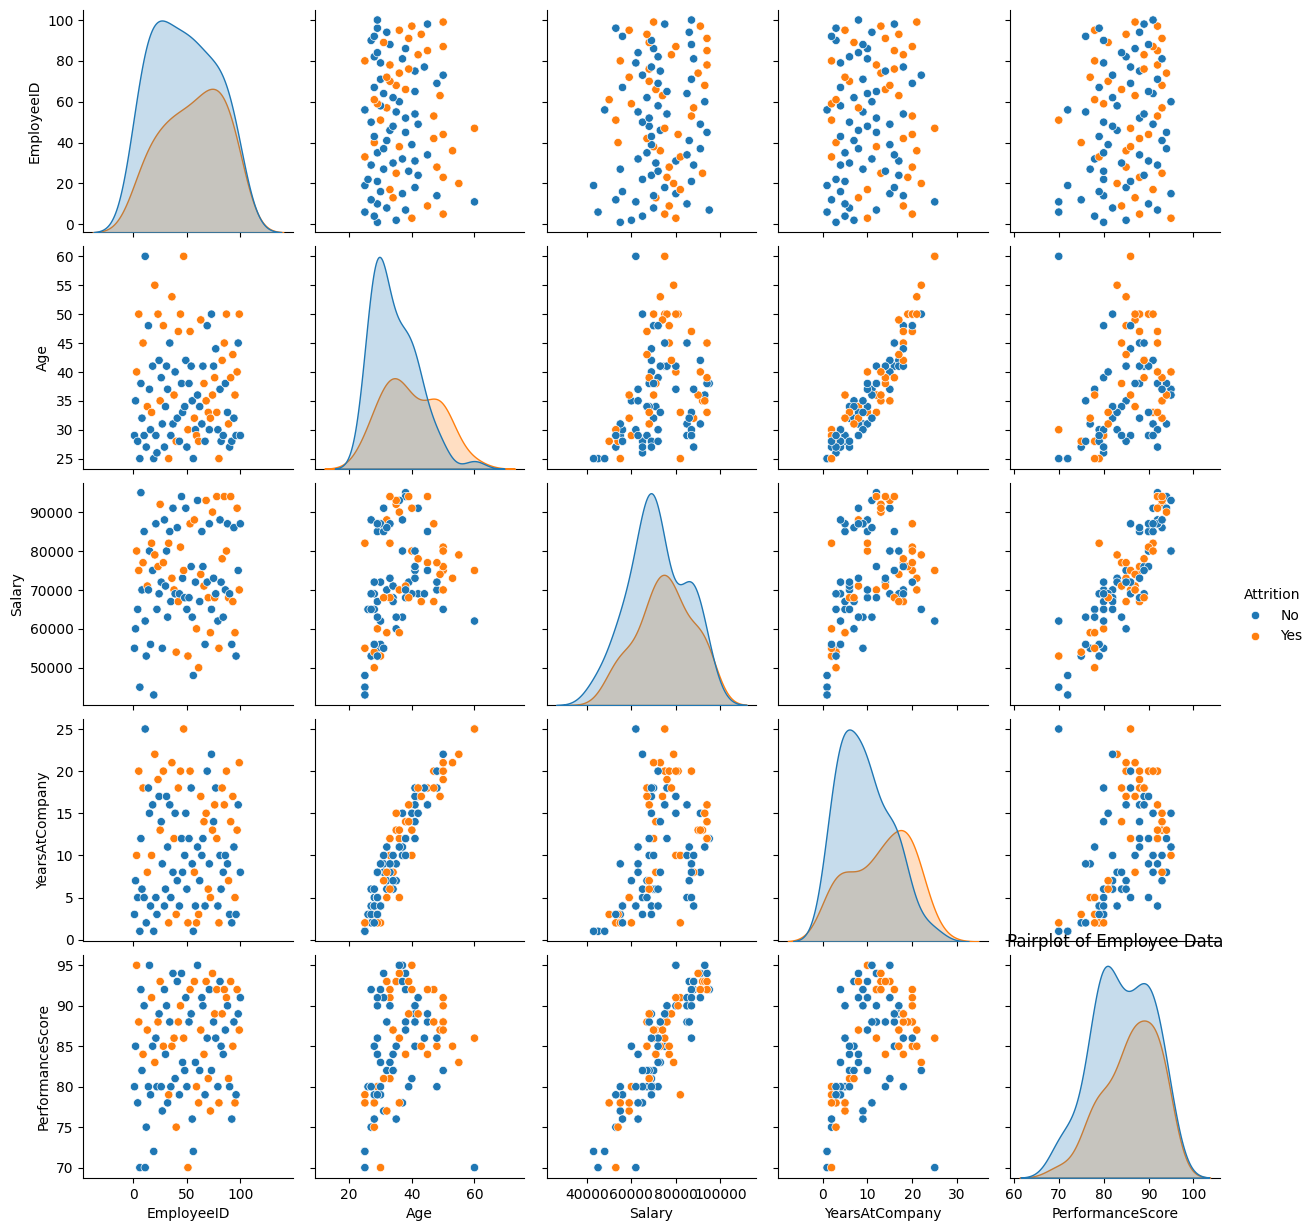

In [21]:
#Use Matplotlib and Seaborn

#Pairplot
sns.pairplot(data, hue = 'Attrition')
plt.title("Pairplot of Employee Data")
plt.show()

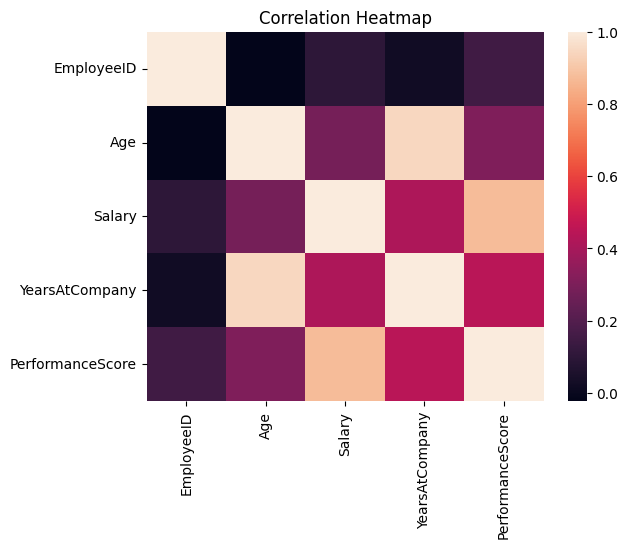

In [22]:
#Heatmap
corr = data.select_dtypes(include = 'number').corr()

sns.heatmap(corr)
plt.title("Correlation Heatmap")
plt.show()

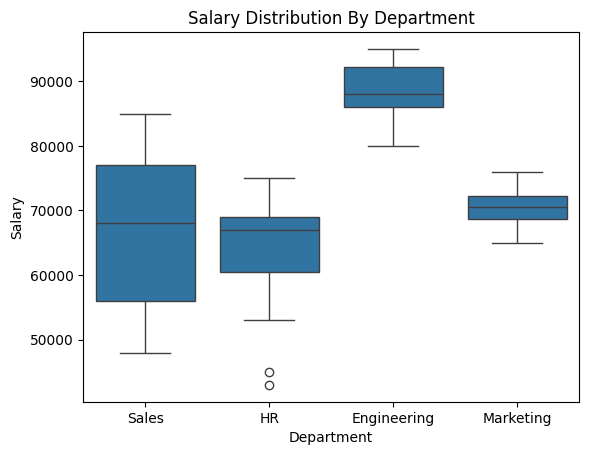

In [23]:
#Boxplot

sns.boxplot(x='Department', y = 'Salary', data = data)
plt.title("Salary Distribution By Department")
plt.show()

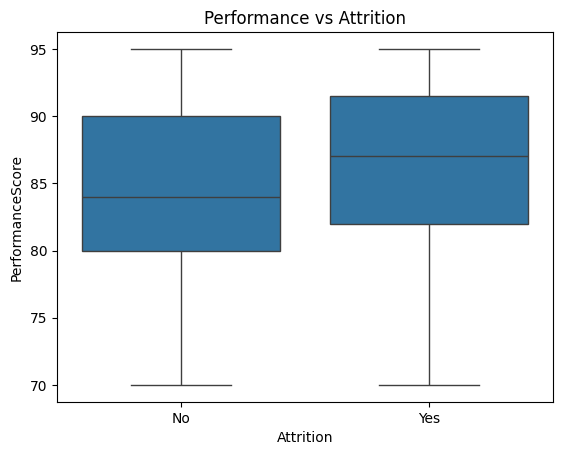

In [24]:
sns.boxplot(x='Attrition', y = 'PerformanceScore', data = data)
plt.title("Performance vs Attrition")
plt.show()

In [25]:
#Step - 3 : Probability And Statistical Analysis
#Probability
#Attrition based on other attributes

p_attrition = data['Attrition'].value_counts(normalize = True)['Yes']
print("P(Attrition = Yes): ", p_attrition)

attrition_by_dept = data[data['Attrition'] == 'Yes']['Department'].value_counts() / data['Department'].value_counts()
print("\nP(Attrition = Yes | Department):\n", attrition_by_dept)

data['PerfScore'] = pd.cut(data['PerformanceScore'], bins = [0,80,90,100], labels = ['Low','Medium', 'High'])
attrition_by_performance = data[data['Attrition'] == 'Yes']['PerfScore'].value_counts() / data['PerfScore'].value_counts()
print("\nP(Attrition = Yes | Performance Level):\n", attrition_by_performance)

P(Attrition = Yes):  0.39

P(Attrition = Yes | Department):
 Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: count, dtype: float64

P(Attrition = Yes | Performance Level):
 PerfScore
Low       0.266667
Medium    0.413043
High      0.500000
Name: count, dtype: float64


In [26]:
#Bayes' Theorem

'''
P(Attrition = Yes | High Performance)
P(A/B) = P(B/A).P(A) / P(B)
'''

# A -> Attrition = Yes
# B -> Performance = High

P_A = (data['Attrition'] == 'Yes').mean()
P_B = (data['PerfScore'] == 'High').mean()

P_B_given_A = ((data['Attrition'] == 'Yes') & (data['PerfScore'] == 'High')).sum() / (data['Attrition'] == 'Yes').sum()
P_A_given_B = (P_B_given_A * P_A) / P_B

print("P(Attrition = Yes | Performance = High):", round(P_A_given_B, 4))

P(Attrition = Yes | Performance = High): 0.5


In [27]:
#Hypothesis Testing

from scipy.stats import f_oneway

groups = [group['PerformanceScore'].values for name, group in data.groupby('Department')]

f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Performance scores differ by department.")
else:
    print("No evidence that performance scores differ.")

F-Statistic: 25.781068086646336
P-Value: 2.5591493445552222e-12
Performance scores differ by department.


In [28]:
'''Phase - 2'''

'Phase - 2'

In [29]:
# Step - 4 : Feature Engineering and Encoding

# Scale Numerical features
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

minmax = MinMaxScaler()
data[['Salary_minmax', 'Perf_minmax']] = minmax.fit_transform(data[['Salary', 'PerformanceScore']])

standard = StandardScaler()
data[['Salary_std', 'Perf_std']] = standard.fit_transform(data[['Salary','PerformanceScore']])

data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfScore,Salary_minmax,Perf_minmax,Salary_std,Perf_std
0,1,John Doe,29,Sales,55000,3,80,No,Low,0.230769,0.40,-1.416484,-0.781900
1,2,Jane Smith,35,HR,60000,7,85,No,Medium,0.326923,0.60,-1.019042,0.009497
2,3,Michael Brown,40,Engineering,80000,10,95,Yes,High,0.711538,1.00,0.570727,1.592290
3,4,Emily Davis,28,Marketing,65000,5,78,No,Low,0.423077,0.32,-0.621600,-1.098459
4,5,David Johnson,50,Sales,75000,20,88,Yes,Medium,0.615385,0.72,0.173285,0.484335


In [30]:
# Label Encoding

label = LabelEncoder()

data['Attrition_encoded'] = label.fit_transform(data['Attrition'])
data['Department_encoded'] = label.fit_transform(data['Department'])

data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfScore,Salary_minmax,Perf_minmax,Salary_std,Perf_std,Attrition_encoded,Department_encoded
0,1,John Doe,29,Sales,55000,3,80,No,Low,0.230769,0.40,-1.416484,-0.781900,0,3
1,2,Jane Smith,35,HR,60000,7,85,No,Medium,0.326923,0.60,-1.019042,0.009497,0,1
2,3,Michael Brown,40,Engineering,80000,10,95,Yes,High,0.711538,1.00,0.570727,1.592290,1,0
3,4,Emily Davis,28,Marketing,65000,5,78,No,Low,0.423077,0.32,-0.621600,-1.098459,0,2
4,5,David Johnson,50,Sales,75000,20,88,Yes,Medium,0.615385,0.72,0.173285,0.484335,1,3


In [31]:
# Step - 5 : Employee Attrition Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [32]:
X = data[['Salary', 'PerformanceScore', 'Department_encoded']]
Y = data['Attrition_encoded']
X = standard.fit_transform(X)

In [33]:
# Split Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [34]:
# Train Classifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [35]:
#Display the predictions

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

Accuracy: 0.5
Precision: 0.2222222222222222
Recall: 0.2
F1 Score: 0.21052631578947367


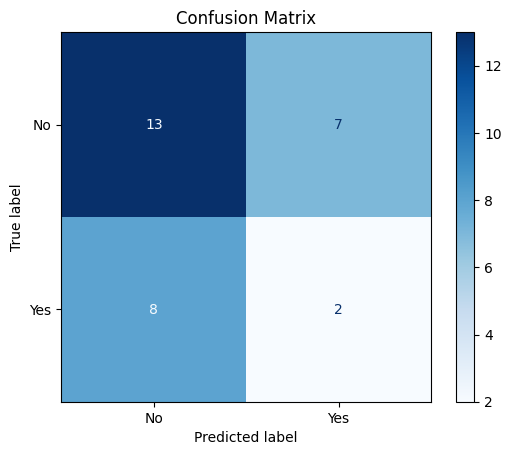

In [36]:
#Visulaize confusion matrix

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.show()

In [37]:
# Step - 6 : Employee Performance Prediction Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X = data[['Salary', 'YearsAtCompany', 'Department_encoded']]
Y = data['PerformanceScore']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [40]:
# Train Linear Regression Model

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)

In [41]:
#Evaluate the model

r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print("R-Square Score:", round(r2, 4))
print("Mean Squared Error:", round(mse, 4))

R-Square Score: 0.787
Mean Squared Error: 10.7622


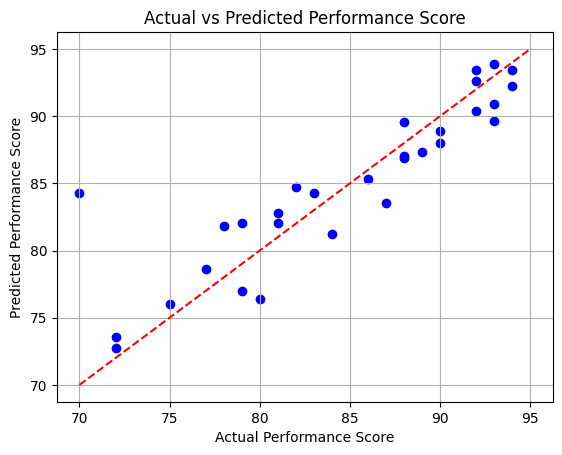

In [42]:
# Visualize Predicted vs Actual

plt.scatter(Y_test, y_pred, color="blue")
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()], color = 'red', linestyle = '--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score")
plt.grid(True)
plt.show()

In [43]:
'''Phase - 3'''

'Phase - 3'

In [44]:
pip install tensorflow

In [45]:
# Step - 7 : Deep Learning For Employee Performance Prediction

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [48]:
# Select features and target

X = data[['Age', 'Salary', 'YearsAtCompany', 'Department_encoded']]
Y = data['PerformanceScore']

X_scaled = minmax.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 42)


In [49]:
#Build FeedForward Neural Network

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
#Compile the model

model.compile(optimizer = Adam(learning_rate=0.01), loss = 'mse', metrics = ['mae'])

In [51]:
# Train the model

history = model.fit(X_train, Y_train, epochs = 100, batch_size = 8, validation_split = 0.2, verbose = 0)

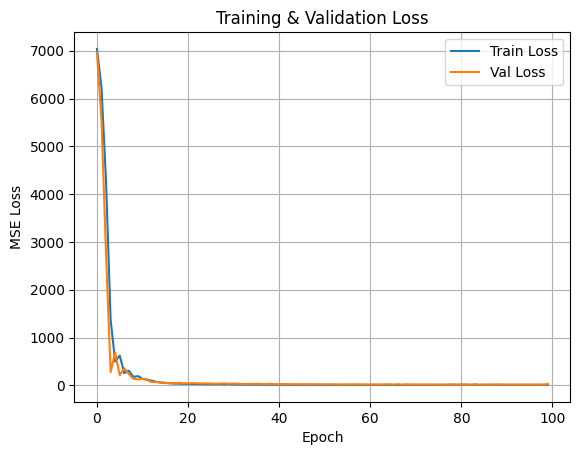

In [52]:
plt.plot(history.history['loss'],label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.grid(True)
plt.show()

In [53]:
#Evaluate the Model

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test,y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R-Square:", round(r2, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Mean Squared Error: 12.15
R-Square: 0.76


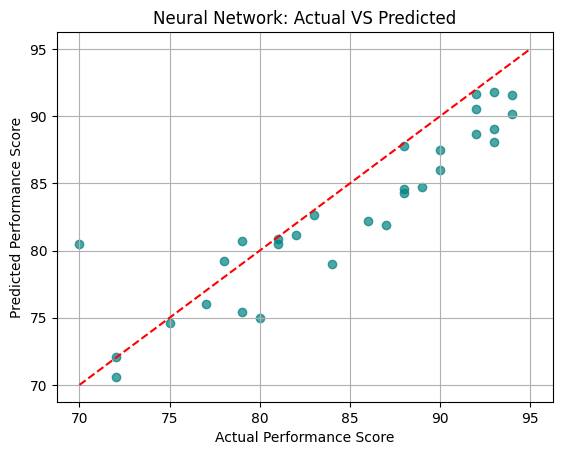

In [55]:
#Visualize Actual vs Predicted

plt.scatter(Y_test, y_pred, alpha = 0.7, color ='teal')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Neural Network: Actual VS Predicted")
plt.grid(True)
plt.show()

In [56]:
# Step - 8 : Employee Attrition Analysis with Deep Learning

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_scaled, Y_train, epochs = 50, batch_size = 32, validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.0000e+00 - loss: 0.7965 - val_accuracy: 0.0000e+00 - val_loss: 0.4613
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0000e+00 - loss: 0.4253 - val_accuracy: 0.0000e+00 - val_loss: 0.2054
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: 0.1774 - val_accuracy: 0.0000e+00 - val_loss: -0.0495
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0000e+00 - loss: -0.0699 - val_accuracy: 0.0000e+00 - val_loss: -0.3061
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0000e+00 - loss: -0.3212 - val_accuracy: 0.0000e+00 - val_loss: -0.5620
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0000e+00 - loss: -0.5699 - val_accuracy: 0.0000e+00 - val_loss: -0.8189
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: -0.8220 - val_accuracy: 0.0000e+00 - val_loss: -1.0782
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy

In [64]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
          70       0.00      0.00      0.00       1.0
          72       0.00      0.00      0.00       1.0
          75       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       3.0
          89       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       2.0
          93       0.00      0.00      0.00       2.0
          94       0.00      0.00      0.00       2.0

    accuracy                           0.00      20.0
   macro avg       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

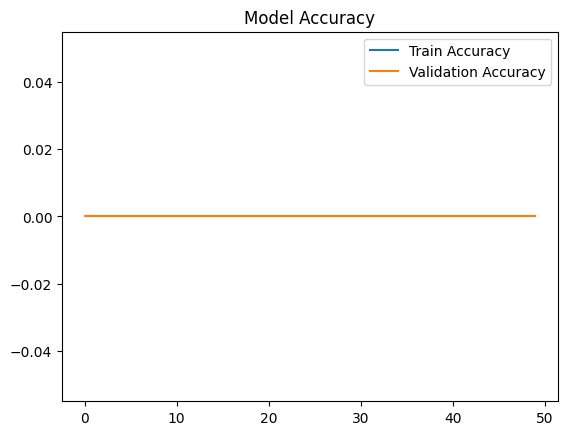

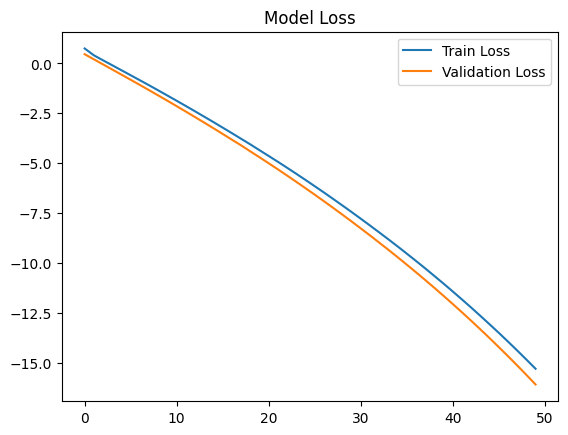

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [68]:
'''Phase - 4'''

'Phase - 4'

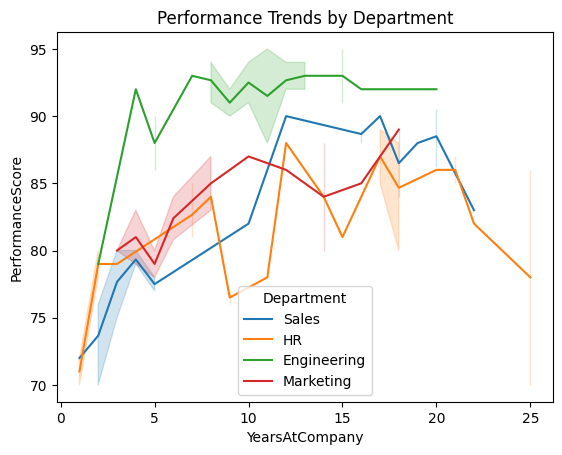

In [70]:
# Line Plot – Performance Trends Over Time
sns.lineplot(data=data, x='YearsAtCompany', y='PerformanceScore', hue='Department')
plt.title("Performance Trends by Department")
plt.show()

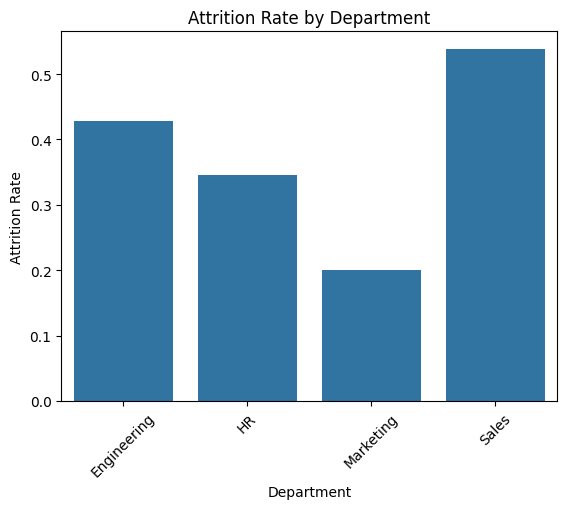

In [77]:
# Bar Chart – Department-wise Attrition Rate

attrition_rate = data.groupby('Department')['Attrition_encoded'].mean().reset_index()

sns.barplot(data=attrition_rate, x='Department', y='Attrition_encoded')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

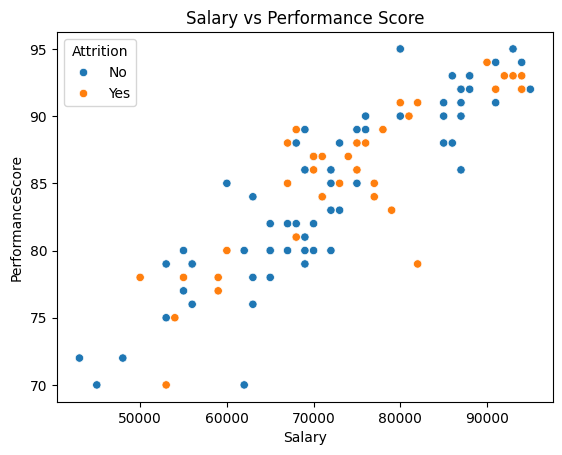

In [73]:
# Scatter Plot – Salary vs. Performance

sns.scatterplot(data=data, x='Salary', y='PerformanceScore', hue='Attrition')
plt.title("Salary vs Performance Score")
plt.show()


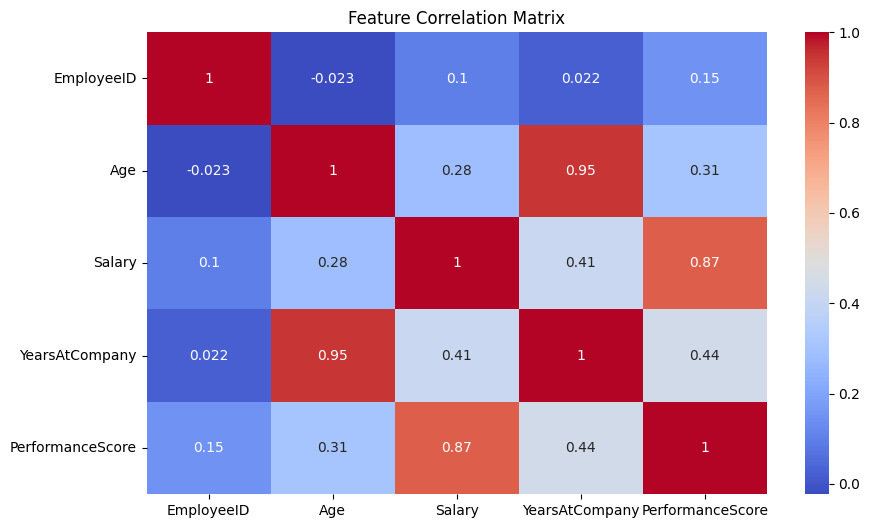

In [78]:
# Heatmap – Correlation Between Features

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()